# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
# data["plot"] = True

# data['min_llema_angle'] = 1

# data['pl_move_trail_trigger']       = 0.0040
# data['stop_loss_pip']               = -0.0040

# data['take_profit_method']  = 'simple'
# data['stop_loss_method']    = 'simple'

# data['start_date'] = {'year':2021, 'month':1, 'date':1}
# data['end_date']   = {'year':2021, 'month':1, 'date':5}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

100%|████████████████████████████▉| 1785524/1788106 [01:46<00:00, 15839.73it/s]

pls    0.02586
dtype: float64
--------------------------------------
                  date ord_types  llema_angle               close_type  \
29 2021-01-20 17:40:05     short          0.0  simple_slema_move_close   
30 2021-01-21 09:00:41     short          0.0  simple_slema_move_close   
31 2021-01-21 14:37:23     short          0.0  simple_slema_move_close   
32 2021-01-22 12:23:54     short         -6.0  simple_slema_move_close   
33 2021-01-22 19:40:35     short          0.0              simple_stop   
34 2021-01-25 14:49:32     short          0.0  simple_slema_move_close   
35 2021-01-26 13:52:47     short          0.0  simple_slema_move_close   
36 2021-01-26 15:14:52     short          0.0  simple_slema_move_close   
37 2021-01-26 17:23:41     short         -8.0  simple_slema_move_close   
38 2021-01-27 12:30:48     short          0.0              simple_stop   
39 2021-01-27 15:22:16     short          0.0  simple_slema_move_close   
40 2021-01-27 19:57:49     short         -0

100%|█████████████████████████████| 1788106/1788106 [01:46<00:00, 16805.27it/s]

Wall time: 2h 10min 18s


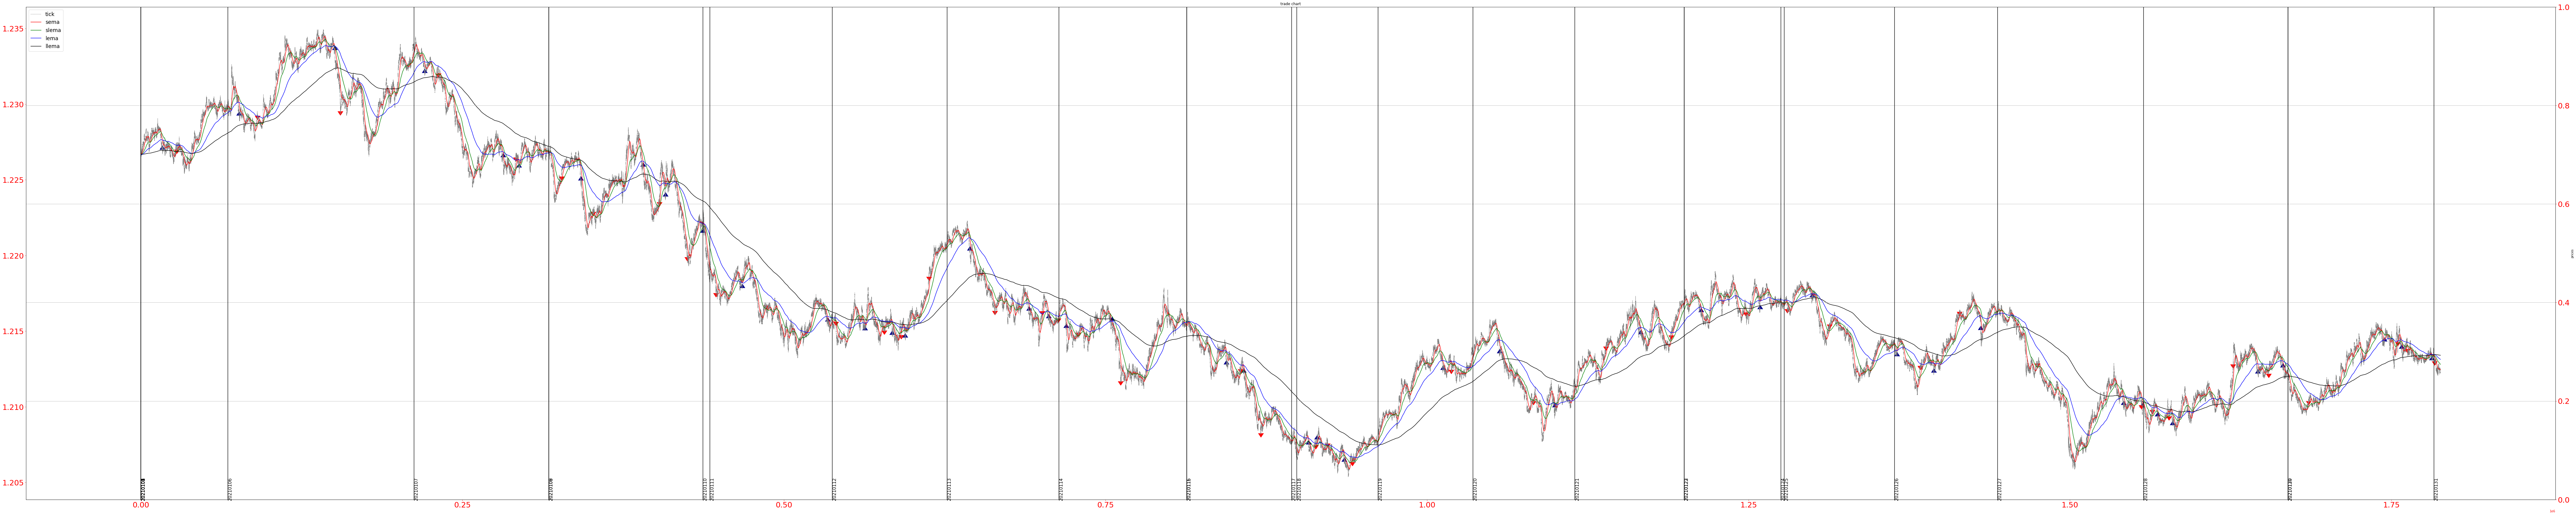

-----------------------------------------------------
date_val          : ['20210101', '20210102', '20210103', '20210104', '20210105', '20210106', '20210107', '20210108', '20210109', '20210110', '20210111', '20210112', '20210113', '20210114', '20210115', '20210116', '20210117', '20210118', '20210119', '20210120', '20210121', '20210122', '20210123', '20210124', '20210125', '20210126', '20210127', '20210128', '20210129', '20210130', '20210131']
Total PL : 0.025859999999999994
-------------
net_pl            : 0.02586/0.05794
-------------
+ve               : num= 40    sum= +0.0419    avg= +0.00105
-ve               : num= 4    sum= -0.01604    avg= -0.00401
-----------------------------------------------------
month_val
1    0.02586
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    34
simple_take_profit          6
simple_stop                 4
Name: close_type, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')